#라이브러리 및 데이터 임포트

In [1]:
import numpy as np
import pandas as pd
import datetime

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


#지하철 데이터 전처리

In [3]:
data_2021_06 = pd.read_csv('/content/drive/MyDrive/데이터셋/6_subway/시간대별데이터/서울교통공사_1-8호선 역별 일별 시간대별 승객유형별 승하차인원_20210630.csv', encoding = 'cp949')
data_2021_06 = data_2021_06.drop(columns=['연번', '역명', '호선', '구분', '승객유형'])
data_2021_06['날짜'] = pd.to_datetime(data_2021_06['날짜'])
data_2021_06['month'] = [x.month for x in data_2021_06['날짜']]
data_2021_06 = data_2021_06[data_2021_06['month'].isin([5,6,7])]
data_2021_06 = data_2021_06.drop(columns=['month'])
data_2021_06 = data_2021_06.groupby(['역번호', '날짜']).sum()
data_2021_06.columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_2021_06 = data_2021_06.stack()
data_2021_06 = pd.DataFrame(data_2021_06).reset_index()
data_2021_06.columns = ['station', 'date', 'hour', 'volume']
data_2021_06['time'] = pd.to_datetime(list(data_2021_06['date'].astype('str') + ' ' + data_2021_06['hour'].astype('str') + ':00' +':00'))
data_2021_06 = data_2021_06[['station', 'time', 'volume']]
data_2021_06

,station,time,volume
0,150,2021-05-01 05:00:00,341
1,150,2021-05-01 06:00:00,1157
2,150,2021-05-01 07:00:00,1805
3,150,2021-05-01 08:00:00,2620
4,150,2021-05-01 09:00:00,3260
...,...,...,...
325199,2827,2021-06-30 19:00:00,423
325200,2827,2021-06-30 20:00:00,255
325201,2827,2021-06-30 21:00:00,276
325202,2827,2021-06-30 22:00:00,252


In [ ]:
len(data_2021_06['station'].unique())

283

In [4]:
data_2021_12 = pd.read_csv('/content/drive/MyDrive/데이터셋/6_subway/시간대별데이터/서울교통공사_1-8호선 역별 일별 시간대별 승객유형별 승하차인원_20211231.csv', encoding = 'cp949')
data_2021_12 = data_2021_12.drop(columns=['연번', '역명', '호선', '구분', '승객유형'])
data_2021_12['날짜'] = pd.to_datetime(data_2021_12['날짜'])
data_2021_12['month'] = [x.month for x in data_2021_12['날짜']]
data_2021_12 = data_2021_12[data_2021_12['month'].isin([5,6,7])]
data_2021_12 = data_2021_12.drop(columns=['month'])
data_2021_12 = data_2021_12.groupby(['역번호', '날짜']).sum()
data_2021_12.columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_2021_12 = data_2021_12.stack()
data_2021_12 = pd.DataFrame(data_2021_12).reset_index()
data_2021_12.columns = ['station', 'date', 'hour', 'volume']
data_2021_12['time'] = pd.to_datetime(list(data_2021_12['date'].astype('str') + ' ' + data_2021_12['hour'].astype('str') + ':00' +':00'))
data_2021_12 = data_2021_12[['station', 'time', 'volume']]
data_2021_12

,station,time,volume
0,150,2021-07-01 05:00:00,606
1,150,2021-07-01 06:00:00,1885
2,150,2021-07-01 07:00:00,5096
3,150,2021-07-01 08:00:00,10399
4,150,2021-07-01 09:00:00,6768
...,...,...,...
165352,2827,2021-07-31 19:00:00,193
165353,2827,2021-07-31 20:00:00,169
165354,2827,2021-07-31 21:00:00,166
165355,2827,2021-07-31 22:00:00,155


In [ ]:
len(data_2021_12['station'].unique())

283

In [5]:
data_2022_06 = pd.read_csv('/content/drive/MyDrive/데이터셋/6_subway/시간대별데이터/서울교통공사_1-8호선 역별 일별 시간대별 승객유형별 승하차인원_20220630.csv', encoding = 'cp949')
data_2022_06 = data_2022_06.drop(columns=['연번', '역명', '호선', '승하차구분', '승객유형', '24시간대이후'])
data_2022_06['수송일자'] = pd.to_datetime(data_2022_06['수송일자'])
data_2022_06['month'] = [x.month for x in data_2022_06['수송일자']]
data_2022_06 = data_2022_06[data_2022_06['month'].isin([5,6,7])]
data_2022_06 = data_2022_06.drop(columns=['month'])
data_2022_06 = data_2022_06.groupby(['고유역번호(외부역코드)', '수송일자']).sum()
data_2022_06.columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_2022_06 = data_2022_06.stack()
data_2022_06 = pd.DataFrame(data_2022_06).reset_index()
data_2022_06.columns = ['station', 'date', 'hour', 'volume']
data_2022_06['time'] = pd.to_datetime(list(data_2022_06['date'].astype('str') + ' ' + data_2022_06['hour'].astype('str') + ':00' +':00'))
data_2022_06 = data_2022_06[['station', 'time', 'volume']]
data_2022_06

,station,time,volume
0,150,2022-05-01 05:00:00,320
1,150,2022-05-01 06:00:00,847
2,150,2022-05-01 07:00:00,1157
3,150,2022-05-01 08:00:00,1723
4,150,2022-05-01 09:00:00,2643
...,...,...,...
316003,2828,2022-06-30 19:00:00,756
316004,2828,2022-06-30 20:00:00,444
316005,2828,2022-06-30 21:00:00,467
316006,2828,2022-06-30 22:00:00,358


In [6]:
data_2022_12 = pd.read_csv('/content/drive/MyDrive/데이터셋/6_subway/시간대별데이터/서울교통공사_1_8호선 역별 일별 시간대별 승객유형별 승하차인원_20221231.csv', encoding = 'cp949')
data_2022_12 = data_2022_12.drop(columns=['연번', '역명', '호선명', '승하차구분', '승객유형', '24시간대이후'])
data_2022_12['수송일자'] = pd.to_datetime(data_2022_12['수송일자'])
data_2022_12['month'] = [x.month for x in data_2022_12['수송일자']]
data_2022_12 = data_2022_12[data_2022_12['month'].isin([5,6,7])]
data_2022_12 = data_2022_12.drop(columns=['month'])
data_2022_12 = data_2022_12.groupby(['역번호', '수송일자']).sum()
data_2022_12.columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
data_2022_12 = data_2022_12.stack()
data_2022_12 = pd.DataFrame(data_2022_12).reset_index()
data_2022_12.columns = ['station', 'date', 'hour', 'volume']
data_2022_12['time'] = pd.to_datetime(list(data_2022_12['date'].astype('str') + ' ' + data_2022_12['hour'].astype('str') + ':00' +':00'))
data_2022_12 = data_2022_12[['station', 'time', 'volume']]
data_2022_12

,station,time,volume
0,150,2022-07-01 05:00:00,653
1,150,2022-07-01 06:00:00,1913
2,150,2022-07-01 07:00:00,5555
3,150,2022-07-01 08:00:00,11323
4,150,2022-07-01 09:00:00,7680
...,...,...,...
160621,2828,2022-07-31 19:00:00,215
160622,2828,2022-07-31 20:00:00,208
160623,2828,2022-07-31 21:00:00,232
160624,2828,2022-07-31 22:00:00,187


In [7]:
data_2021 = pd.concat([data_2021_06, data_2021_12])
data_2022 = pd.concat([data_2022_06, data_2022_12])

In [8]:
len(set(set(data_2021_06['station'].unique()) & set(data_2021_12['station'].unique()) & set(data_2022_06['station'].unique()) & set(data_2022_12['station'].unique())))

274

In [ ]:
station_list = set(set(data_2021_06['station'].unique()) & set(data_2021_12['station'].unique()) & set(data_2022_06['station'].unique()) & set(data_2022_12['station'].unique()))
station_list

In [10]:
data_2021 = data_2021[data_2021['station'].isin(station_list)]
data_2022 = data_2022[data_2022['station'].isin(station_list)]

#역별 좌표 입력

In [ ]:
locations = pd.read_csv('/content/drive/MyDrive/데이터셋/6_subway/서울교통공사_1_8호선 역사 좌표(위경도) 정보_20211231.csv', encoding = 'cp949')
locations = locations[['고유역번호(외부역코드)', '위도', '경도']]
locations.columns = ['station', 'latitude', 'longitude']
locations

,station,latitude,longitude
0,150,37.553150,126.972533
1,151,37.563590,126.975407
2,152,37.570203,126.983116
3,153,37.570429,126.992095
4,154,37.570971,127.001900
...,...,...,...
271,2823,37.451568,127.159845
272,2824,37.445057,127.156735
273,2825,37.440952,127.147590
274,2826,37.437575,127.140936


In [ ]:
data_2021 = pd.merge(data_2021, locations, how = 'left', left_on = 'station', right_on = 'station')

In [ ]:
data_2022 = pd.merge(data_2022, locations, how = 'left', left_on = 'station', right_on = 'station')

#클러스터와 역 매치

In [ ]:
clusters_for_live = pd.read_csv('/content/drive/MyDrive/데이터셋/3_live_work_and_clustering/version_2/clusters_for_live')
clusters_for_work = pd.read_csv('/content/drive/MyDrive/데이터셋/3_live_work_and_clustering/version_2/clusters_for_work')

In [ ]:
clusters_total = pd.concat([clusters_for_live, clusters_for_work]).sort_values('cluster')

In [ ]:
clusters_locations = pd.DataFrame(clusters_total.groupby('cluster')['latitude', 'longitude'].mean()).reset_index()
clusters_locations

<ipython-input-19-4b2b6c3d6404>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clusters_locations = pd.DataFrame(clusters_total.groupby('cluster')['latitude', 'longitude'].mean()).reset_index()


,cluster,latitude,longitude
0,0,37.517115,126.869460
1,1,37.558498,127.075855
2,2,37.478357,127.124176
3,3,37.646911,127.066212
4,4,37.581627,126.909230
...,...,...,...
395,395,37.536528,126.973933
396,396,37.475195,126.901123
397,397,37.503831,127.113303
398,398,37.508565,127.041870


In [ ]:
near_list = []
for i in clusters_locations['cluster']:
  distance_list = []
  cluster_location = clusters_locations[clusters_locations['cluster']==i]
  for j in locations['station']:
    distance = np.sqrt((cluster_location['latitude'].values[0] - locations[locations['station']==j]['latitude'].values[0])**2 + (cluster_location['longitude'].values[0] - locations[locations['station']==j]['longitude'].values[0])**2)
    distance_list.append(distance)
  near_list.append(locations['station'].unique()[distance_list.index(min(distance_list))])

In [ ]:
clusters_locations['near_station'] = near_list
clusters_locations = clusters_locations[['cluster', 'near_station']]

In [ ]:
clusters_locations

,cluster,near_station
0,0,248
1,1,2727
2,2,2820
3,3,2716
4,4,2619
...,...,...
395,395,2630
396,396,232
397,397,2817
398,398,220


#train test에 역이용량 merge

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이터셋/5_최종데이터/train_clustered_weather.csv')
train = pd.merge(train, clusters_locations, how = 'left', left_on = 'cluster', right_on = 'cluster')
train['시간'] = pd.to_datetime(train['시간'])

In [ ]:
train = pd.merge(train, data_2021, how = 'left', left_on = ['near_station', '시간'], right_on = ['station', 'time'])
train = train.fillna(0)
train = train[['cluster', '시간', '순대여량', '기온', '풍속', '강수량', '미세먼지', '초미세먼지', 'volume']]
train

,cluster,시간,순대여량,기온,풍속,강수량,미세먼지,초미세먼지,volume
0,0,2021-05-01 00:00:00,0.0,11.3,1.3,0.0,31.0,16.0,0.0
1,0,2021-05-01 01:00:00,1.0,11.2,1.6,0.0,31.0,17.0,0.0
2,0,2021-05-01 02:00:00,-2.0,10.8,1.5,0.0,29.0,16.0,0.0
3,0,2021-05-01 03:00:00,2.0,10.9,0.3,0.0,33.0,20.0,0.0
4,0,2021-05-01 04:00:00,0.0,10.9,1.3,0.0,36.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...
883195,399,2021-07-31 19:00:00,-7.0,31.2,2.0,0.0,26.0,17.0,972.0
883196,399,2021-07-31 20:00:00,-5.0,29.7,1.3,0.0,23.0,15.0,830.0
883197,399,2021-07-31 21:00:00,0.0,28.8,1.4,0.0,18.0,12.0,940.0
883198,399,2021-07-31 22:00:00,-6.0,28.6,2.0,0.0,18.0,12.0,793.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/데이터셋/5_최종데이터/test_clustered_weather.csv')
test = pd.merge(test, clusters_locations, how = 'left', left_on = 'cluster', right_on = 'cluster')
test['시간'] = pd.to_datetime(test['시간'])

In [ ]:
test = pd.merge(test, data_2022, how = 'left', left_on = ['near_station', '시간'], right_on = ['station', 'time'])
test = test.fillna(0)
test = test[['cluster', '시간', '순대여량', '기온', '풍속', '강수량', '미세먼지', '초미세먼지', 'volume']]
test

,cluster,시간,순대여량,기온,풍속,강수량,미세먼지,초미세먼지,volume
0,0,2022-05-01 00:00:00,-7.0,11.9,1.2,0.0,52.0,35.0,0.0
1,0,2022-05-01 01:00:00,8.0,11.5,0.8,0.0,47.0,31.0,0.0
2,0,2022-05-01 02:00:00,1.0,11.1,0.9,0.0,40.0,25.0,0.0
3,0,2022-05-01 03:00:00,0.0,10.0,0.4,0.0,34.0,19.0,0.0
4,0,2022-05-01 04:00:00,2.0,9.8,1.1,0.0,31.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...
883195,399,2022-07-31 19:00:00,0.0,26.7,0.6,0.5,11.0,7.0,970.0
883196,399,2022-07-31 20:00:00,0.0,26.5,0.7,0.5,12.0,8.0,830.0
883197,399,2022-07-31 21:00:00,0.0,26.1,1.1,17.5,11.0,7.0,879.0
883198,399,2022-07-31 22:00:00,-1.0,25.9,0.8,16.5,8.0,5.0,749.0


#저장

In [ ]:
# train.to_csv('/content/drive/MyDrive/데이터셋/6_subway/train_subway.csv', index = False)
# test.to_csv('/content/drive/MyDrive/데이터셋/6_subway/test_subway.csv', index = False)

#EDA

In [15]:
data_2021['Hour'] = [x.hour for x in data_2021['time']]
data_2022['Hour'] = [x.hour for x in data_2022['time']]

<Axes: xlabel='Hour'>

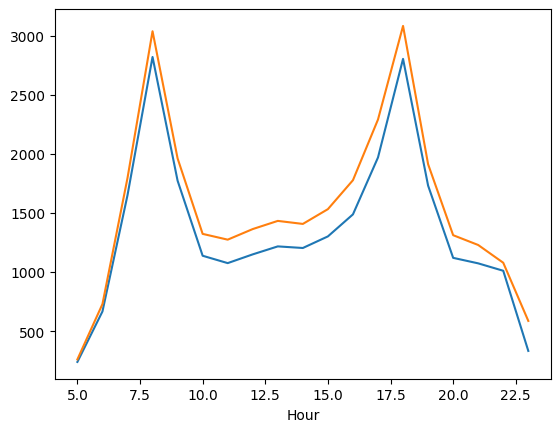

In [17]:
data_2021.groupby('Hour')['volume'].mean().plot()
data_2022.groupby('Hour')['volume'].mean().plot()